# デシル分析

In [1]:
import pandas as pd
import numpy as np
import os
os.makedirs('out', exist_ok=True)

### Google Colabを利用する場合は、次のセルの全行の#を1つ削除して実行する

In [ ]:
#from google.colab import drive
# drive.mount('/content/drive')

# データフレームへの読み込み
# Google DriveのColab Notebooksにダウンロードしたフォルダ(marketing)をセットすることを想定
#iPath = '/content/drive/MyDrive/Colab Notebooks/marketing/Chapter_4/in/'
# iFile=iPath+'sec4-1data.csv'

# データの読み込み
#df_decile_data = pd.read_csv(iFile)

In [2]:
# コード4.1 モジュールのインポート，データの読み込みと集計
# データの読み込み
df_decile_data = pd.read_csv('in/sec4-1data.csv')

# モニタ別金額集計
df_decile_groupby = df_decile_data.groupby('モニタ')
df = df_decile_groupby.agg({'金額': 'sum'})

# 最初の10行を表示
df.head(10)

,金額
モニタ,
14,1306
15,2880
16,38163
20,45981
21,1949
28,25263
31,216
32,8745
37,203218


In [3]:
# コード4.2 デシル分析の各ランクの閾値とモニタ別のランクの計算
decile = df.reset_index(drop=True)
decile_rank, bins = pd.qcut(decile['金額'], 10, retbins=True, labels=False)
decile['rank'] = decile_rank + 1
decile = decile[['rank', '金額']].groupby('rank').sum()
decile['閾値'] = bins[:-1]
decile

,金額,閾値
rank,,
1,3106,36.0
2,8250,559.0
3,15105,1056.0
4,32745,2357.0
5,54395,3736.0
6,89835,6505.5
7,138430,9974.0
8,302953,23218.5
9,409666,31821.0


In [4]:
# コード4.3 デシル分析の累積構成比率の計算
decile = decile.sort_values('rank', ascending=False)
decile['累積金額'] = decile['金額'].cumsum()
decile['累積構成比率(%)'] = decile['累積金額'] / decile['金額'].sum() * 100
decile

,金額,閾値,累積金額,累積構成比率(%)
rank,,,,
10,2309497,64153.5,2309497,68.653667
9,409666,31821.0,2719163,80.831675
8,302953,23218.5,3022116,89.837460
7,138430,9974.0,3160546,93.952524
6,89835,6505.5,3250381,96.623020
5,54395,3736.0,3304776,98.240002
4,32745,2357.0,3337521,99.213402
3,15105,1056.0,3352626,99.662424
2,8250,559.0,3360876,99.907669


(0.0, 100.0)

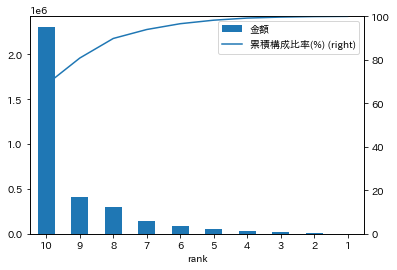

In [5]:
# japanize_matplotlibaがインストールされていない場合は以下を実行
#!pip install japanize_matplotlib

# コード4.4 パレート図の作成
import japanize_matplotlib

# パレート図を簡易的に作成する。
# 次のセルにはパレート図を厳密に書く場合を記載する
decile.index = decile.index.astype(str)
ax = decile[['金額']].plot.bar()
decile[['累積構成比率(%)']].plot(ax=ax, secondary_y='累積構成比率(%)')
ax.get_figure().get_axes()[1].set_ylim(0, 100)

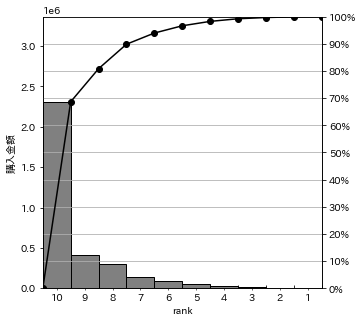

In [6]:
# コード4.4 パレート図の作成 (厳密バージョン)

from matplotlib import pyplot as plt
import japanize_matplotlib

# パレート図
fig, ax1 = plt.subplots(figsize=(5, 5))

# 要素数
data_num = len(decile)

# 累積折れ線グラフ用データ
accum_to_plot = [0] + decile["累積構成比率(%)"].tolist()

# 累積比率ラベル
percent_labels = [str(i) + '%' for i in np.arange(0, 100+1, 10)]

# 各デシルの棒グラフ
ax1.bar(range(1, data_num + 1),
        decile["金額"], align="edge", width=-1, edgecolor='k', color='gray')

# デシル棒グラフの調整
ax1.set_xticks([0.5 + i for i in range(data_num)], minor=True)
#ax1.set_xticklabels(decile["rank"].tolist(), minor=True)
ax1.set_xticklabels(decile.index.tolist(), minor=True)
ax1.tick_params(axis="x", which="major", direction="in")
ax1.set_ylim([0, sum(decile["金額"])])
ax1.set_xlabel("rank")  # ランク
ax1.set_ylabel("購入金額")  # 購入金額

# 累積折れ線グラフの調整
ax2 = ax1.twinx()
ax2.set_xticks(range(data_num+1))
ax2.plot(range(data_num+1), accum_to_plot, c="k", marker="o")
ax2.set_xticklabels([])
ax2.set_xlim([0, data_num])
ax2.set_ylim([0, 100])
ax2.set_yticks(np.arange(0, 100+1, 10))
ax2.set_yticklabels(percent_labels)

# 水平線の表示
ax2.grid(True, which='both', axis='y')

#plt.savefig('out/pareto.eps',bbox_inches='tight', dpi=600)

# 例題4.9

In [7]:
# コード4.5 パレート図作成のための集計

# GoogleColabを利用している場合
# df_decile_data = pd.read_csv(iFile)

# データの読み込み
df_decile_data = pd.read_csv('in/sec4-1data.csv')

# 中分類名が加工食品のみを抽出
decil = df_decile_data.loc[df_decile_data['中分類名'] == '加工食品', ['細分類名', '購入数量']]
decil = decil.groupby('細分類名').sum()
rank, bins = pd.qcut(decil['購入数量'], 10, retbins=True, labels=False)
decil['rank'] = rank + 1
decil = decil[['rank', '購入数量']].groupby('rank').sum()
decil['閾値'] = bins[:-1]
decil = decil.sort_values('rank', ascending=False)
decil['累積購入数量'] = decil['購入数量'].cumsum()
decil['累積構成比率(%)'] = decil['累積購入数量'] / decil['購入数量'].sum() * 100
decil

# パレート図は省略

,購入数量,閾値,累積購入数量,累積構成比率(%)
rank,,,,
10,4096,127.0,4096,51.821862
9,1241,67.0,5337,67.522773
8,816,57.0,6153,77.846660
7,654,40.0,6807,86.120951
6,428,25.0,7235,91.535931
5,240,18.0,7475,94.572368
4,226,10.0,7701,97.431680
3,90,7.0,7791,98.570344
2,81,3.0,7872,99.595142


RFM分析

In [8]:
# コード4.6 RFM分析のためのデータの準備
import pandas as pd

# GoogleColabを利用している場合
# df_rfm_data_org = pd.read_csv(iFile, parse_dates=['日付'])

# データの読み込み
df_rfm_data_org = pd.read_csv('in/sec4-1data.csv', parse_dates=['日付'])

# データの分割
df_rfm_data = df_rfm_data_org[df_rfm_data_org['日付'] <= '2013-11-30']
df_rfm_data_dec = df_rfm_data_org[df_rfm_data_org['日付'] > '2013-11-30']

In [9]:
# コード4.7 R値の計算
from datetime import datetime
# R値の計算
# 各モニタの最大日付を抽出
Rvalue = df_rfm_data[['モニタ', '日付']].groupby('モニタ').max()
Rvalue['R値'] = (datetime(2013, 12, 1) - Rvalue['日付']).dt.days
Rvalue = Rvalue[['R値']]
Rvalue

,R値
モニタ,
14,78
15,139
16,169
20,1
21,281
...,...
847,281
946,264
968,236


In [10]:
# コード4.8 F値の計算
# Fの値
Fvalue = df_rfm_data[~df_rfm_data.duplicated(subset=['モニタ', '日付'])].groupby([
    'モニタ'])[['日付']].count()
Fvalue = Fvalue.rename(columns={'日付': 'F値'})
Fvalue

,F値
モニタ,
14,1
15,1
16,17
20,31
21,1
...,...
847,1
946,4
968,3


In [11]:
# コード4.9 M値の計算
# Mの値
df_M_groupby = df_rfm_data.groupby('モニタ')
Mvalue = df_M_groupby.agg({'金額': 'sum'}).rename(columns={'金額': 'M値'})
Mvalue

,M値
モニタ,
14,1306
15,2880
16,38163
20,41323
21,1949
...,...
847,678
946,6378
968,19401


In [12]:
# コード4.10 RFMクラス
# RFM値の結合と整形
RFM = Rvalue.join(Fvalue).join(Mvalue)

# 中央値の計算
R_thres = Rvalue['R値'].median()
F_thres = Fvalue['F値'].median()
M_thres = Mvalue['M値'].median()

RFM['Rclass'] = np.where(RFM['R値'] < R_thres, 'H', 'L')
RFM['Fclass'] = np.where(RFM['F値'] > F_thres, 'H', 'L')
RFM['Mclass'] = np.where(RFM['M値'] > M_thres, 'H', 'L')

RFM['RFMclass'] = RFM['Rclass'] + RFM['Fclass'] + RFM['Mclass']

# 最初の10行の出力
RFM.head(10)

,R値,F値,M値,Rclass,Fclass,Mclass,RFMclass
モニタ,,,,,,,
14,78,1,1306,L,L,L,LLL
15,139,1,2880,L,L,L,LLL
16,169,17,38163,L,H,H,LHH
20,1,31,41323,H,H,H,HHH
21,281,1,1949,L,L,L,LLL
28,108,10,25263,L,H,H,LHH
32,48,9,8745,H,H,H,HHH
37,1,86,184043,H,H,H,HHH
38,5,117,507478,H,H,H,HHH


In [13]:
# コード4.11 RFMセグメント別の12月の購入状況
# 12月のモニタ別購入状況の集計
df_rfm_dec_groupby = df_rfm_data_dec.groupby('モニタ')
pt_rfm_dec = df_rfm_dec_groupby.agg({'購入数量': 'sum'})

# 12月の購入を列結合
RFM_evaluate = RFM.join(pt_rfm_dec)
# NaNの場合は0を代入
RFM_evaluate['購入数量'] = RFM_evaluate['購入数量'].fillna(0.)
# 来店（購入数量>0）の評価
RFM_evaluate['12月来店'] = np.where(RFM_evaluate['購入数量'] == 0, 'N', 'Y')
RFM_evaluate

,R値,F値,M値,Rclass,Fclass,Mclass,RFMclass,購入数量,12月来店
モニタ,,,,,,,,,
14,78,1,1306,L,L,L,LLL,0.0,N
15,139,1,2880,L,L,L,LLL,0.0,N
16,169,17,38163,L,H,H,LHH,0.0,N
20,1,31,41323,H,H,H,HHH,37.0,Y
21,281,1,1949,L,L,L,LLL,0.0,N
...,...,...,...,...,...,...,...,...,...
847,281,1,678,L,L,L,LLL,0.0,N
946,264,4,6378,L,L,L,LLL,0.0,N
968,236,3,19401,L,L,H,LLH,0.0,N


In [14]:
# セグメントごとの12月の購入状況の評価
# セグメントごとの購入数量
mean_q = RFM_evaluate[['RFMclass', '購入数量']].groupby('RFMclass').mean()

# 再購入の有無の人数
rebuy = pd.crosstab(RFM_evaluate['RFMclass'], RFM_evaluate['12月来店'])

# 再購入率の計算
ratio = rebuy['Y'] / (rebuy['Y'] + rebuy['N']) * 100
ratio.name = 'rebuy'

# 結果の結合
rebuy_result = rebuy.join(ratio).join(mean_q)
rebuy_result.columns = ['再購入なし', '再購入あり', '再購入率(%)', '平均購入数量']

# 結果の出力
rebuy_result

,再購入なし,再購入あり,再購入率(%),平均購入数量
RFMclass,,,,
HHH,9,25,73.529412,39.441176
HHL,2,1,33.333333,1.333333
HLH,2,0,0.000000,0.000000
HLL,9,3,25.000000,2.000000
LHH,6,2,25.000000,12.375000
LHL,2,0,0.000000,0.000000
LLH,6,1,14.285714,1.142857
LLL,31,3,8.823529,1.088235
